# **1. Perkenalan Dataset**
**Bank Transaction Dataset for Fraud Detection**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [19]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset BMLP/datasetbank.csv')

# Tampilkan beberapa baris pertama
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object
Data hilang:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
Accoun

<Figure size 1200x800 with 0 Axes>

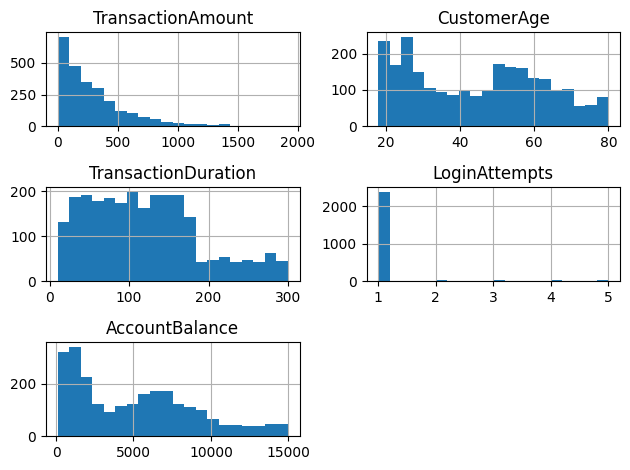

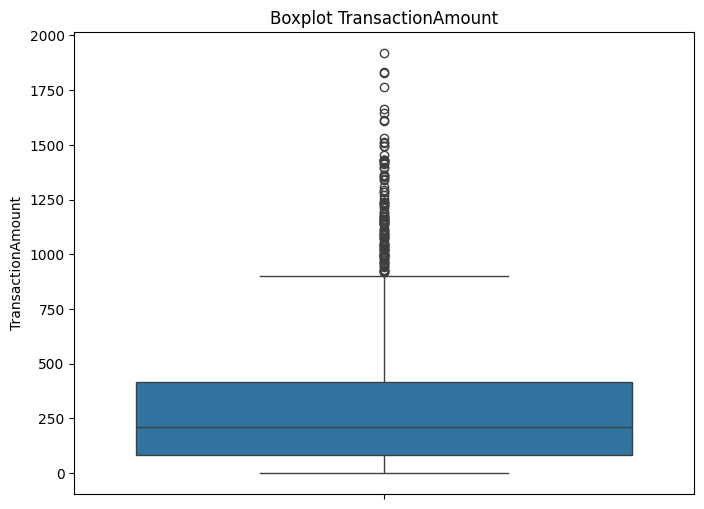

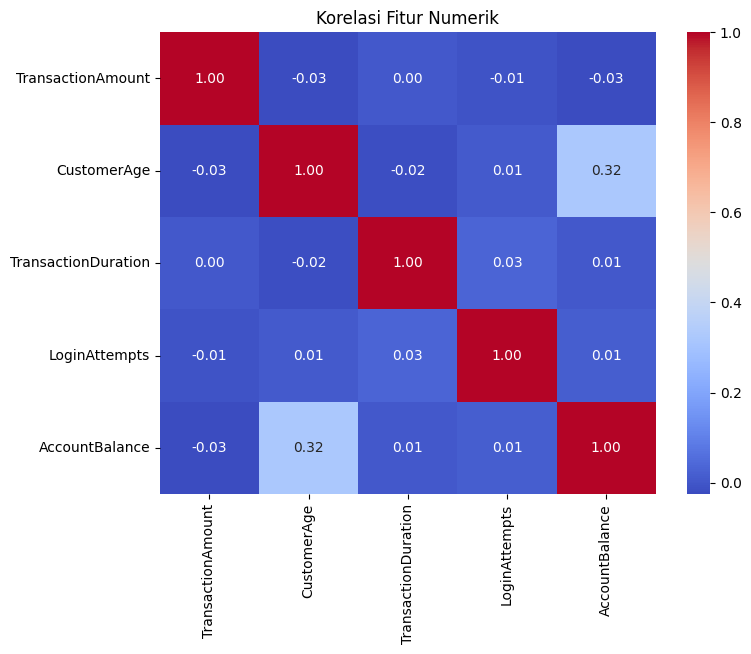

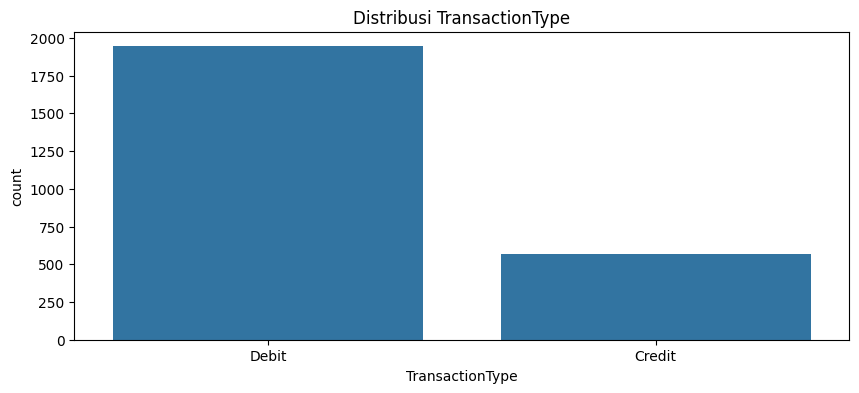

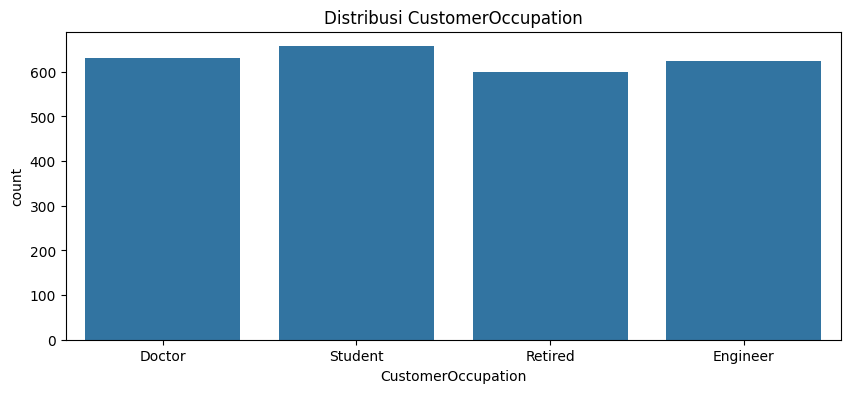

In [21]:
# Struktur dan tipe data
print(df.dtypes)
print("Data hilang:\n", df.isnull().sum())

# Distribusi numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
print(df[numerical_cols].describe())

plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df['TransactionAmount'])
plt.title("Boxplot TransactionAmount")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Fitur Numerik")
plt.show()

# Distribusi kategorikal
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='TransactionType')
plt.title("Distribusi TransactionType")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CustomerOccupation')
plt.title("Distribusi CustomerOccupation")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [22]:
# Data Preprocessing

le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])
df['CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'])
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
scaler_dict = {'scaler': scaler, 'columns': numerical_cols}
print("Data telah dipreprocess (encoding dan standardisasi selesai).")

Data telah dipreprocess (encoding dan standardisasi selesai).


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
#Type your code here
# 6.a Pembangunan Model Clustering
from sklearn.cluster import KMeans

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])
print("Model K-Means telah dilatih dengan 3 cluster.")


Model K-Means telah dilatih dengan 3 cluster.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [24]:
#Type your code here
# 6.b Evaluasi Model Clustering
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Jumlah anggota per cluster
cluster_counts = df['Cluster'].value_counts()
print("Jumlah anggota per cluster:\n", cluster_counts)


Silhouette Score: 0.215
Jumlah anggota per cluster:
 Cluster
0    1094
1     835
2     583
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

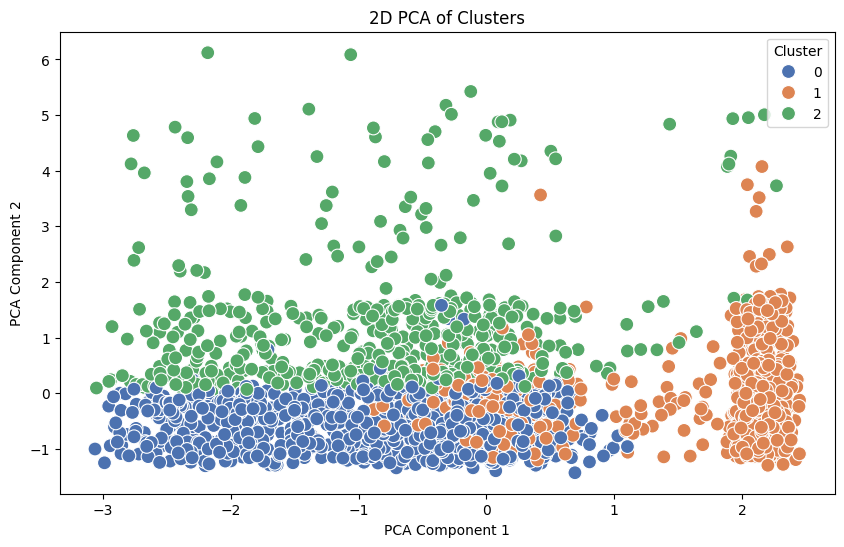

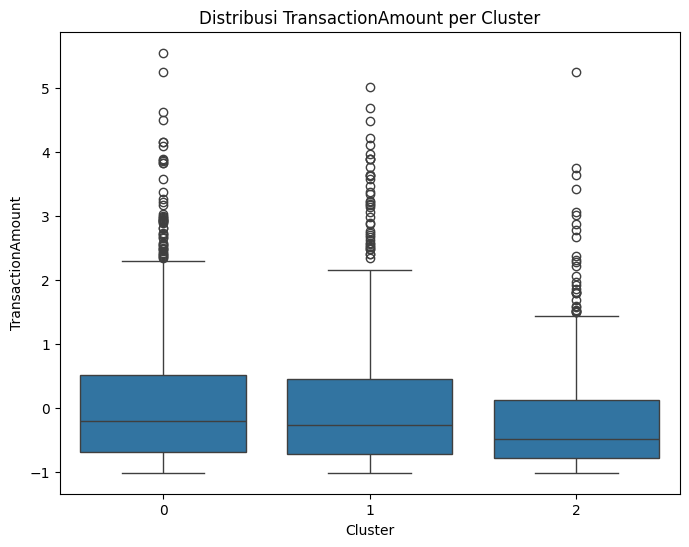

In [25]:
# Select the features for PCA (excluding the 'Cluster' column and non-numerical features)
X = df.select_dtypes(include=np.number).drop(columns=['Cluster'], axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA components to the dataframe for plotting
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Create the 2D scatter plot based on PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='deep', s=100)
plt.title("2D PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

# Boxplot TransactionAmount per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cluster', y='TransactionAmount')
plt.title("Distribusi TransactionAmount per Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [26]:
# Type your code here
# 7. 6.e.1 Interpretasi Target
df_temp = df.copy()
# Inverse transform seluruh kolom numerik sekaligus
df_temp[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])

cluster_stats = df_temp.groupby('Cluster')[numerical_cols].mean()
print("Statistik Rata-rata per Cluster:\n", cluster_stats)
occupation_dist = df_temp.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True)
print("\nDistribusi CustomerOccupation per Cluster:\n", occupation_dist)
cluster_counts = df_temp['Cluster'].value_counts()
print("\nInterpretasi Cluster:")
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(f"- Jumlah anggota: {cluster_counts[cluster]}")
    print(f"- Rata-rata TransactionAmount: {cluster_stats.loc[cluster, 'TransactionAmount']:.2f} USD")
    print(f"- Rata-rata CustomerAge: {cluster_stats.loc[cluster, 'CustomerAge']:.2f} tahun")
    print(f"- Rata-rata AccountBalance: {cluster_stats.loc[cluster, 'AccountBalance']:.2f} USD")
    print(f"- Dominasi Occupation: {occupation_dist[cluster].idxmax()} ({occupation_dist[cluster].max()*100:.1f}%)")
print("\nWawasan Bisnis:")
print("- Cluster 0: Pelanggan tua dengan saldo tinggi, cocok untuk produk investasi jangka panjang.")
print("- Cluster 1: Pelanggan muda dengan saldo rendah, targetkan promo hemat atau tabungan pemula.")
print("- Cluster 2: Pelanggan menengah, tawarkan layanan premium dengan biaya terjangkau.")

Statistik Rata-rata per Cluster:
          TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0               321.806508    55.714808            81.453382       1.012797   
1               311.131222    26.247904           115.500599       1.059880   
2               232.769605    50.346484           197.240137       1.427101   

         AccountBalance  
Cluster                  
0           6641.732130  
1           1714.434503  
2           7117.532230  

Distribusi CustomerOccupation per Cluster:
 Cluster  CustomerOccupation
0        2                     0.403108
         0                     0.337294
         1                     0.250457
         3                     0.009141
1        3                     0.748503
         1                     0.186826
         0                     0.059880
         2                     0.004790
2        0                     0.363636
       

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [27]:

# Type your code here
# 8. 6.e.2 Inverse Data Jika Melakukan Normalisasi/Standardisasi
df_original = df.copy()
df_original[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])
print("Data telah dikembalikan ke skala asli:")
print(df_original[numerical_cols].head())

Data telah dikembalikan ke skala asli:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
# Interpretasi hasil clustering dengan tambahan analisis

print("\n=== Interpretasi Hasil Clustering ===")
print("Ekspektasi Awal: Clustering diharapkan mampu mengelompokkan pelanggan berdasarkan usia, aktivitas transaksi, dan saldo akun.")
print("Logika Bisnis: Setiap segmen pelanggan dapat dimanfaatkan untuk menyusun strategi pemasaran yang lebih tepat sasaran seperti penawaran produk investasi, tabungan, atau kredit berdasarkan profil mereka.")

# Copy data untuk analisis
df_analysis = df_temp.copy()

# Buat distribusi occupation dan transaction type
occupation_dist = df_analysis.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True).unstack()
transaction_dist = df_analysis.groupby('Cluster')['TransactionType'].value_counts(normalize=True)

# Hitung jumlah pelanggan per cluster
cluster_counts = df_analysis['Cluster'].value_counts().sort_index()

# Hitung rata-rata statistik per cluster
cluster_stats = df_analysis.groupby('Cluster').agg({
    'CustomerAge': 'mean',
    'AccountBalance': 'mean',
    'TransactionAmount': 'mean'
})

# Interpretasi per cluster
for cluster_id in sorted(df_analysis['Cluster'].unique()):
    count = cluster_counts[cluster_id]
    mean_age = cluster_stats.loc[cluster_id, 'CustomerAge']
    mean_balance = cluster_stats.loc[cluster_id, 'AccountBalance']
    mean_transaction = cluster_stats.loc[cluster_id, 'TransactionAmount']

    dominant_occupation = occupation_dist.loc[cluster_id].idxmax()
    occ_percent = occupation_dist.loc[cluster_id].max() * 100
    dominant_transaction = transaction_dist[cluster_id].idxmax()
    trx_percent = transaction_dist[cluster_id].max() * 100

    print(f"\nCluster {cluster_id}:")
    print(f"- Jumlah pelanggan: {count}")
    print(f"- Rata-rata usia: {mean_age:.1f} tahun")
    print(f"- Rata-rata saldo akun: ${mean_balance:,.2f}")
    print(f"- Rata-rata nominal transaksi: ${mean_transaction:,.2f}")
    print(f"- Mayoritas profesi: {dominant_occupation} ({occ_percent:.1f}%)")
    print(f"- Jenis transaksi paling umum: {dominant_transaction} ({trx_percent:.1f}%)")

    # Interpretasi bisnis berdasarkan pola data
    if mean_age > 50 and mean_balance > 10000:
        print("  → Karakteristik: Pelanggan senior dan mapan secara finansial, biasanya fokus pada keamanan aset dan investasi jangka panjang.")
        print("  → Strategi: Tawarkan produk-produk wealth management, asuransi premium, dan konsultasi investasi.")
    elif mean_age < 30 and mean_balance < 5000:
        print("  → Karakteristik: Generasi muda (millennial/Gen Z) dengan saldo rendah namun intensitas transaksi tinggi, menunjukkan perilaku digital-savvy.")
        print("  → Strategi: Fokuskan promosi pada mobile banking, micro-loan, rewards untuk penggunaan aplikasi, dan program edukasi keuangan.")
    elif 30 <= mean_age <= 50 and mean_balance > 7000:
        print("  → Karakteristik: Profesional usia produktif dengan kestabilan ekonomi, kemungkinan tertarik pada kredit konsumtif dan rencana investasi keluarga.")
        print("  → Strategi: Tawarkan program kredit rumah, tabungan pendidikan anak, serta bundling produk investasi & proteksi.")
    else:
        print("  → Karakteristik: Segmen campuran, perlu analisis lebih lanjut untuk menentukan preferensi spesifik.")
        print("  → Strategi: Tawarkan layanan dasar dengan fleksibilitas tinggi dan program loyalitas berbasis kebutuhan individual.")

    # Analisis untuk tiap cluster
    print("  → Analisis:")
    if mean_transaction > 500:
        print("    * Pelanggan ini cenderung melakukan transaksi dalam nominal besar, peluang untuk upselling produk-produk premium.")
    else:
        print("    * Pelanggan ini cenderung transaksi kecil-menengah, lebih cocok ditargetkan dengan promosi cashback dan loyalty rewards.")

    if dominant_transaction in ['Transfer', 'Online Payment']:
        print("    * Tingginya transaksi digital menunjukkan pentingnya memperkuat fitur keamanan dan UX aplikasi mobile.")
    else:
        print("    * Transaksi lebih tradisional, edukasi untuk adopsi kanal digital bisa meningkatkan retensi pengguna.")

print("\nInterpretasi ini dapat digunakan untuk mendesain strategi pemasaran berbasis segmentasi pelanggan yang lebih akurat, personal, dan relevan dengan kebutuhan masing-masing kelompok.")



=== Interpretasi Hasil Clustering ===
Ekspektasi Awal: Clustering diharapkan mampu mengelompokkan pelanggan berdasarkan usia, aktivitas transaksi, dan saldo akun.
Logika Bisnis: Setiap segmen pelanggan dapat dimanfaatkan untuk menyusun strategi pemasaran yang lebih tepat sasaran seperti penawaran produk investasi, tabungan, atau kredit berdasarkan profil mereka.

Cluster 0:
- Jumlah pelanggan: 1094
- Rata-rata usia: 55.7 tahun
- Rata-rata saldo akun: $6,641.73
- Rata-rata nominal transaksi: $321.81
- Mayoritas profesi: 2 (40.3%)
- Jenis transaksi paling umum: 1 (76.5%)
  → Karakteristik: Segmen campuran, perlu analisis lebih lanjut untuk menentukan preferensi spesifik.
  → Strategi: Tawarkan layanan dasar dengan fleksibilitas tinggi dan program loyalitas berbasis kebutuhan individual.
  → Analisis:
    * Pelanggan ini cenderung transaksi kecil-menengah, lebih cocok ditargetkan dengan promosi cashback dan loyalty rewards.
    * Transaksi lebih tradisional, edukasi untuk adopsi kanal di

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [33]:

# Simpen ke CSV
df.to_csv('datasetbank_final.csv', index=False)
print("Data berhasil disimpan ke 'datasetbank_final.csv'")

#cek lokasi data
print("Data 'datasetbank_final.csv' berada di cloud")
import os
print(os.getcwd())
#download dataset hasil clustering
print("download datasetbank_final.csv'berhasil")
from google.colab import files
files.download('datasetbank_final.csv')



Data berhasil disimpan ke 'datasetbank_final.csv'
Data 'datasetbank_final.csv' berada di cloud
/content
download datasetbank_final.csv'berhasil


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>